In [259]:
import numpy as np
from cvxopt import matrix,solvers,spdiag
solvers.options['show_progress'] = False

# Identity kernal function

In [143]:
def kern_id(x1,x2,p):
    return (np.dot(x1,x2))

# Non-Linear kernal function

In [144]:
def kern_nl(x1,x2,p):
    return ((np.dot(x1,x2) +1) ** p)


<b>svm</b> is a SVM classifer which calls the kernel function specified above. Linear SVM is a special case in it 

<b>INPUTS</b>

<b>X</b>                                  :<i><i>The dataset</i>   (N x D) <br>
<b>t</b>                                  :<i><i>The Labels</i>    (N x 1) <br>
<b>C</b>                                  :<i>Penalty factor for slack variables</i> (Scalar)<br>
<b>kern</b>                               :<i>Reference to the kernal function</i><br><br><br> 

<b>RETURN TUPLE</b>

The function return a tuple comprising <b>(alpha,sv,w,b,result,slack)</b>

<b>alpha</b>                              : <i>Output of the quadratic programming function</i> (N x 1) <br>
<b>sv</b>                                 : <i>Support Vectors (boolean)</i> (N x 1) <br>
<b>w</b>                                  : <i>Parameters pf the classifier</i> (D x 1) <br>
<b>b</b>                                  : <i>Bias of the classifier</i>   (Scalar) <br>
<b>result</b>                             : <i>Result of the classification on the training data</i> (N x 1) <br>
<b>slack</b>                              : <i>Points inside the margin (Boolean)</i> (Nx1) <br>





In [157]:
def svm(X,t,C,kern):
    
    N = X.shape[0]                                              #No. of samples
    D = X.shape[1]                                              #Dimension of samples/points
    
   
    #P = matrix(np.dot( np.dot(np.diag(t),X), np.dot(X.T,np.diag(t))), tc = 'd')
    
    P = matrix(np.zeros((N,N)))
    
    for i in range(N):
        for j in range(N):
            P[i,j] = t[i] * t[j] * kern(X[i,:],X[j,:],2)
    
    q = matrix(-1 * np.ones((N,1)), tc = 'd')
    G = matrix(np.concatenate((np.eye(N) * -1,np.eye(N))), tc = 'd')
    h = matrix(np.concatenate((np.zeros((N,1)),np.ones((N,1)) * C)), tc = 'd')
    A = matrix(np.dot(t.T,np.eye(N)),tc = 'd').T
    b = matrix(np.zeros((1,1)),tc = 'd')
    

    
    alpha = solvers.qp(P,q,G,h,A,b)
    
    print 'Data type of alpha is '
    
    sv = map(lambda i: i>(5*10**-7),alpha['x'])                #Support Vectors** default tolerance = 1e-7
    sv_idx = [i for i in range(N) if sv[i] == True]            #list of support vector indexes
    
    
    w = np.sum(np.dot(np.diag(np.array(alpha['x'][sv_idx])[:,0]),np.dot(np.diag(t[sv_idx]),X[sv_idx,:])), axis=0 )
    
    
    b = 0
    
    
    
    #it_in = np.nditer(sv, flags = ['f_index'])
    
    for i in sv_idx:
        sum = 0
        for j in sv_idx:
            sum += alpha['x'][j] * t[j] * np.dot(X[j,:], (X[i,:].T))

        b += t[i] - sum
            
    b = b * 1.0 / len(sv_idx);                     #Division by no of support vectors including slack vars
    
    
    res = (np.dot(w,X.T) + b).T                 #Mapped values
    
    slack = ((t * res) < 1)                       #values on the wrong side of the margin
    
    result = res / abs(res)                       #class mapping
    
    
            
    
    return (alpha, sv, w, b, result, slack)
    
    

# Parameter Values

<b> C </b>                                  : <i>  Penalty factor for slack variables</i> (Scalar)<br>                    

In [153]:
class parameters(object):
    
    def __init__(self,C,C2,norm):
        self.C = C
        self.C2 = C2
        self.norm = norm
        
    def getParams():
        return (C,C2,norm)
    
    

# Sample Class

Each sample object has two attributes, <i><b>data</b></i> and <i><b>label</b></i>. The constructor takes the paths to the files containing <i><b>data</b></i> and <i><b>label</b></i> respectively

In [154]:
class sample(object):
    
    def __init__(self,f_data,f_label):
        
        self.f_data = f_data                                #file name containing data
        self.f_label = f_label                              #file name containing labels
        
        fyle = open(f_data,'rb')
        self.data = np.fromfile(fyle,sep=' ', dtype=np.double)
        fyle.close()
        self.data = np.reshape(self.data,(self.data.shape[0]/2,2),order='C')
        
        fyle = open(f_label,'rb')
        self.label = np.fromfile(fyle,sep=' ', dtype=np.double)
        fyle.close()
           

# Digit Class

Each digit object has two attributes, <i><b>train</b></i> and <i><b>test</b></i>. The constructor takes the paths to the files containing <i><b>train</b></i> samples and <i><b>test</b></i> samples respectively

In [155]:
class digit(object):
    
    def __init__(self,f_train,f_test):
        
        d = 256   #deimension of the image space i.e. 16 x 16
        
        self.f_train = f_train
        self.f_test = f_test
        
        fyle = open(f_train,'rb')
        #self.train = np.fromfile(fyle,sep=',', dtype=np.double)
        self.train = np.empty([1,d])
        
        lines = fyle.readlines()
        
        for i in range(len(lines)):
            temp = map(lambda x: float(x),lines[i].split(','))
            self.train = np.vstack((self.train,temp))
        
        fyle.close()
        
        
        fyle = open(f_test,'rb')
        self.test = np.empty([1,d])
        
        lines = fyle.readlines()
        
        for i in range(len(lines)):
            temp = map(lambda x: float(x),lines[i].split(','))
            self.test = np.vstack((self.test,temp))
        
        fyle.close()
        
        

# Main Script


Accuracy lin SVM with C = 1000: 0.864865


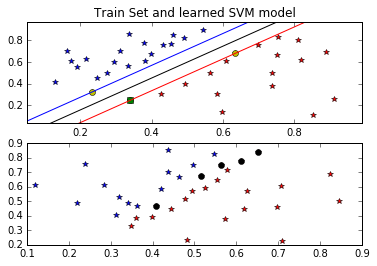

training error for the digits classifier is 0.000600601
Test error for the digits classifier is 0.00694444


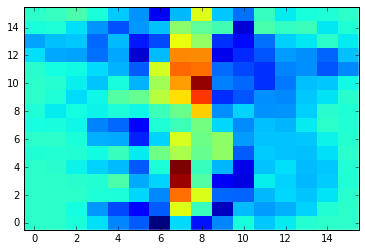

Accuracy of kernel SVM with C = 1000: 0.945946



In [260]:
import matplotlib.pyplot as plt 
import scipy.io as load

#Hyperparameters

C = 1000
C2 = 1000
norm = 2

p = parameters(C,C2,norm)

f_train_data = './data/lc_train_data.dat'
f_train_label = './data/lc_train_label.dat'

train = sample(f_train_data,f_train_label)

f_test_data = './data/lc_test_data.dat'
f_test_label = './data/lc_test_label.dat'

test = sample(f_test_data,f_test_label)

#train the SVM
(alpha, sv, w, b, result, slack)  = svm(train.data, train.label, p.C, kern_id);

sv_idx = [i for i in range(len(sv)) if sv[i] == True]            #list of support vector indexes
slk_idx = [i for i in range(len(slack)) if slack[i] == True]

#ploting
xmax = np.amax(train.data[:, 0]);
xmin = np.amin(train.data[:, 0]);
ymax = np.amax(train.data[:, 1]);
ymin = np.amin(train.data[:, 1]);

xmargin = (xmax-xmin)/10.0;
ymargin = (ymax-ymin)/10.0;

plt.subplot(2,1,1)
plt.title('Train Set and learned SVM model')
plt.plot(train.data[np.where(train.label==1), 0], train.data[np.where(train.label==1), 1],'b*')
plt.plot(train.data[np.where(train.label==-1), 0], train.data[np.where(train.label==-1), 1],'r*')

plt.plot(train.data[sv_idx, 0], train.data[sv_idx,1], 'yo')
plt.axis([xmin-xmargin, xmax+xmargin, ymin-ymargin, ymax+ymargin])

#Plot the slack points
plt.plot(train.data[slk_idx,0], train.data[slk_idx,1], 'gs')

x = np.linspace(-xmax,xmax,int(xmax*2/0.001))
y = -(w[0]*x + b)/w[1]
pos = -(w[0]*x + b + 1)/w[1]
neg = -(w[0]*x + b - 1)/w[1]

plt.plot(x, y, 'k-')
plt.plot(x, neg, 'b-')
plt.plot(x, pos, 'r-')

#plt.legend(['CLass 1','Class -1'])

resultv = np.sign(np.dot(test.data,w) + b);

plt.subplot(2,1,2)
plt.plot(test.data[np.where(test.label==1), 0], test.data[np.where(test.label==1),1], 'b*');
plt.plot(test.data[np.where(test.label==-1),0], test.data[np.where(test.label==-1),1], 'r*');
 # incorrectly classified
plt.plot(test.data[np.where(test.label!=resultv),0], test.data[np.where(test.label!=resultv),1], 'ko');
accuracy = 1.0 * sum(resultv==test.label)/test.label.shape[0]
print 'Accuracy lin SVM with C = %g: %g' % (p.C, accuracy)
plt.show()


one = digit('./data/digit_1_train.dat','./data/digit_1_test.dat')
three = digit('./data/digit_3_train.dat','./data/digit_3_test.dat')
eight = digit('./data/digit_8_train.dat','./data/digit_8_test.dat')



X = np.hstack((one.train.T,three.train.T))
t_train1 = np.ones((one.train.shape[0]))

t_train3 = (-1.0)*np.ones((three.train.shape[0]))
t = np.hstack((t_train1.T, t_train3.T))

#Retraining the classifier
(alpha, sv, w, b, result, slack) = svm(X.T, t, p.C, kern_id)

train_result = result;
train_result[train_result < 0] = -1;
train_result[train_result >= 0] = 1;
train_error = 1.0 * sum(train_result != t) / float(t.shape[0])
print 'training error for the digits classifier is %g' % train_error


Xtest = np.hstack((one.test.T, three.test.T))
ttest = np.hstack((np.ones((1,one.test.shape[0])),(-1)*np.ones((1,three.test.shape[0]))))

testresult = np.dot(w,Xtest) + b

testresult[testresult < 0] = -1
testresult[testresult >= 0] = 1

test_error = 1.0 * sum(testresult != ttest[0,:]) / float(ttest.shape[1])

print 'Test error for the digits classifier is %g' % test_error


w = np.reshape(w, (16, 16))
plt.imshow(w, aspect='auto', interpolation='none', origin='lower')
plt.show()



# kernel SVM
(alpha, sv, w, b, result, slack)  = svm(train.data, train.label, p.C2, kern_nl);

sv_idx = [i for i in range(len(sv)) if sv[i] == True]


# Run the classifier on the test data


result = np.sign(np.dot(alpha['x'][sv_idx].T * train.label[sv_idx], 
                        kern(test.data,train.data[sv_idx,:].T,p.norm).T) + b) 

#accuracy on test data
accuracy = 1.0 * sum(result[0,:].T==test.label)/test.label.shape[0]

print 'Accuracy of kernel SVM with C = %g: %g\n' % (p.C2, accuracy)
